In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [8]:
def convert_str_list_to_array(probs_list):
    prob_new_list = []
    for prob_str in probs_list:
        prob_str = prob_str[1:-1]
        prob_new_list.append(prob_str)
    prob_array = np.array(prob_new_list, dtype=np.float32)
    return prob_array



In [9]:
def get_cross_entropy_results(window_size, network, strategy, optimizer_name = 'Adam_lr_2e-06'):
    from sklearn.metrics import roc_auc_score
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    general_auc_knn = []
    general_auc_svm = []
    general_auc_rf = []
    general_auc_top = []
    general_auc_all = []
    general_std_knn = []
    general_std_svm = []
    general_std_rf = []
    general_std_top = []
    general_std_all = []
    for percentage in percentages:
        
        base_path = '/home/yesid08/ExperimentsV4/cross_entropy/{}/{}/{}/{}/{}/{}/results'.format(
            window_size,
            'BCE',
            optimizer_name,
            network,
            strategy,
            percentage
        )
        aucs_knn = []
        aucs_svm = []
        aucs_rf = []
        aucs_top = []
        aucs_all = []
        for fold in range(1,6):
            kfold_csv = pd.read_csv(base_path+'kfold_results_{}.csv'.format(fold))
            kfold_csv = kfold_csv[kfold_csv['folds']== 'test']
            probs_list = kfold_csv['probs'].values.tolist()
            probs_array = convert_str_list_to_array(probs_list)
            aucs_top.append( roc_auc_score(kfold_csv['labels'], probs_array) )
        general_auc_top.append( np.mean(aucs_top) )
        general_std_top.append( np.std(aucs_top) )

    result = {
        'top': {
            'auc_std': general_std_top,
            'auc_mean': general_auc_top
        },

    }
    return result

In [10]:
def get_contrastive_results(fold, window_size, contrastive_loss, network, strategy, optimizer_name = 'RMSprop_mom_0.6_lr_1e-06', mining='ep-hn'):
    from sklearn.metrics import roc_auc_score
    
    general_auc_knn = []
    general_auc_svm = []
    general_auc_rf = []
    general_auc_top = []
    general_auc_all = []
    general_std_knn = []
    general_std_svm = []
    general_std_rf = []
    general_std_top = []
    general_std_all = []
    

    base_path = '/home/churtado26/Data/contrastive/Experiments/'

    aucs_knn = []
    aucs_svm = []
    aucs_rf = []
    aucs_top = []
    aucs_all = []

    kfold_csv = pd.read_csv(base_path+'results/kfold_results_{}.csv'.format(fold))
    kfold_csv = kfold_csv[kfold_csv['folds']== 'test']
    aucs_top.append( roc_auc_score(kfold_csv['labels'], kfold_csv['lr_probs']) )
    print(aucs_top)

    general_auc_top.append( np.mean(aucs_top) )
    general_std_top.append( np.std(aucs_top) )

    result = {
        'top': {
            'auc_std': general_std_top,
            'auc_mean': general_auc_top
        },

    }
    return result

[0.3396264109479572]
[0.8697253498895086]
[0.3375]
[0.7769436445907034]
[0.4023849725622626]


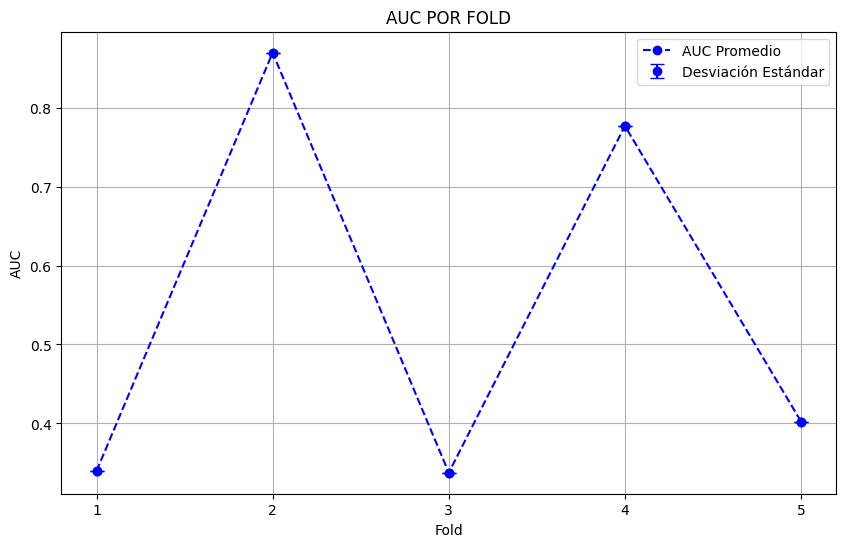

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la lista de folds
folds = [1, 2, 3, 4, 5]  # Ajusta esto según la cantidad de folds que tengas

# Inicializar listas para almacenar los resultados por fold
auc_means = []
auc_std_devs = []

# Llamar a la función get_contrastive_results para cada fold
for fold in folds:
    optimizer = 'RMSprop_mom_0.6_lr_1e-06'
    strategy = 'reduce_positives'
    window_size = '12_32_32'
    model = 'mertash512'
    contrastive_loss = 'NTXentLoss_T_0.07'
    
    result = get_contrastive_results(fold, window_size, contrastive_loss, model, strategy, optimizer)
    
    # Obtener el AUC promedio y su desviación estándar
    auc_mean = result['top']['auc_mean'][0]  # El índice 0 corresponde al único porcentaje en tu código
    auc_std = result['top']['auc_std'][0]
    
    # Agregar los resultados a las listas
    auc_means.append(auc_mean)
    auc_std_devs.append(auc_std)

# Crear un gráfico de puntos con una línea punteada
plt.figure(figsize=(10, 6))
plt.plot(folds, auc_means, marker='o', linestyle='--', color='b', label='AUC Promedio')
plt.errorbar(folds, auc_means, yerr=auc_std_devs, fmt='o', color='b', capsize=5, label='Desviación Estándar')
plt.xlabel('Fold')
plt.ylabel('AUC')
plt.title('AUC POR FOLD')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()


In [19]:
aucs_top

NameError: name 'aucs_top' is not defined

In [13]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'mertash64', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

FileNotFoundError: [Errno 2] No such file or directory: '/home/churtado26/Data/contrastive/Experiments/kfold_results_1.csv'

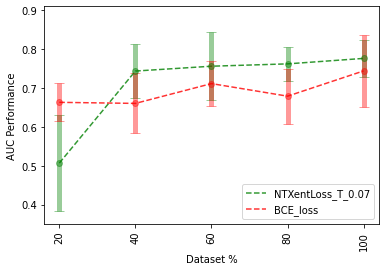

{'top': {'auc_std': [0.1242066423344581,
   0.07034367222588128,
   0.08703205667389974,
   0.04384193831886946,
   0.04854231830750018],
  'auc_mean': [0.50665,
   0.7437166666666666,
   0.7561833333333333,
   0.7622,
   0.7763166666666667]}}

In [36]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'mertash64', strategy, 'Adam_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)



color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

In [37]:
baseline_4

{'top': {'auc_std': [0.04885216929108109,
   0.07748296586992522,
   0.05696221944802051,
   0.0711936638878614,
   0.09207731654551095],
  'auc_mean': [0.6631500000000001,
   0.6603833333333332,
   0.7114166666666668,
   0.6790333333333333,
   0.7441166666666666]}}

# ALEXANET


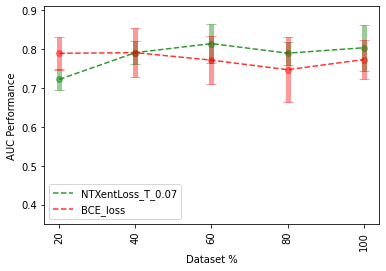

{'top': {'auc_std': [0.027941526244800778,
   0.028807097890778424,
   0.04918518295403829,
   0.029477599781679808,
   0.059621770818683],
  'auc_mean': [0.7222666666666666,
   0.7911333333333334,
   0.8144666666666668,
   0.7897666666666667,
   0.8036666666666665]}}

In [38]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'alexanet512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'alexanet64', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

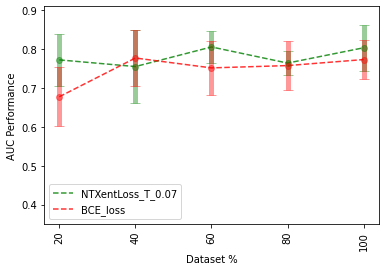

{'top': {'auc_std': [0.06652638574280134,
   0.0947586642183418,
   0.04028433663072756,
   0.029821412888504577,
   0.059621770818683],
  'auc_mean': [0.7724666666666666,
   0.7553000000000001,
   0.8057500000000001,
   0.7642499999999999,
   0.8036666666666665]}}

In [39]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'alexanet512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'alexanet64', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

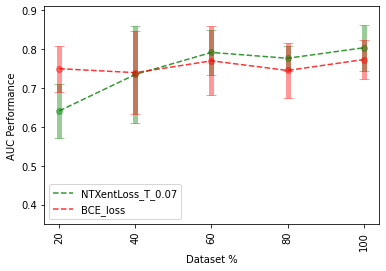

{'top': {'auc_std': [0.06892431436808862,
   0.12464260462975287,
   0.05876772545841429,
   0.032163540435302444,
   0.059621770818683],
  'auc_mean': [0.6412500000000001,
   0.7349833333333333,
   0.7916833333333333,
   0.7766333333333334,
   0.8036666666666665]}}

In [40]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'alexanet512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'alexanet64', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# Mertash-Lenet inspired V1

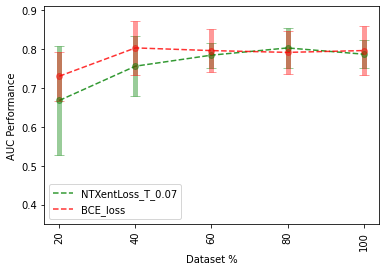

{'top': {'auc_std': [0.14009032403734703,
   0.07696816802346859,
   0.031956932824593075,
   0.051689844263646256,
   0.035797268672965066],
  'auc_mean': [0.66795,
   0.7562833333333334,
   0.7846499999999998,
   0.8032666666666666,
   0.7871666666666667]}}

In [44]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MertashLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

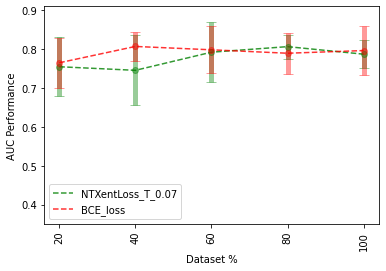

{'top': {'auc_std': [0.07603070286257899,
   0.08998533831192232,
   0.07651640347010569,
   0.031103143821092347,
   0.035797268672965066],
  'auc_mean': [0.7548166666666666,
   0.7455833333333334,
   0.7922999999999999,
   0.8065833333333332,
   0.7871666666666667]}}

In [45]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MertashLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

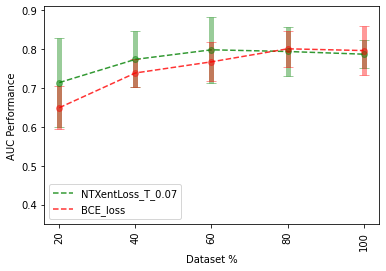

{'top': {'auc_std': [0.11498475744395183,
   0.07214664079344078,
   0.08550119557318744,
   0.06192993352706482,
   0.035797268672965066],
  'auc_mean': [0.7140833333333334,
   0.7737999999999999,
   0.7984499999999999,
   0.7940833333333334,
   0.7871666666666667]}}

In [46]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MertashLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MertashLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

 # BiparametricLenetInspiredV1

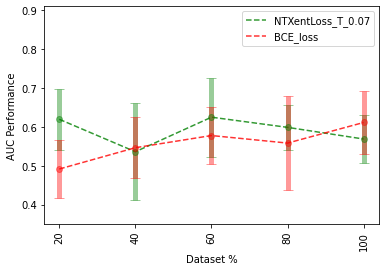

{'top': {'auc_std': [0.07907667868032339,
   0.1250405978517022,
   0.10160772061654022,
   0.05847811556471361,
   0.06226075096809478],
  'auc_mean': [0.61945,
   0.5359,
   0.6249,
   0.5986833333333333,
   0.5686500000000001]}}

In [50]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

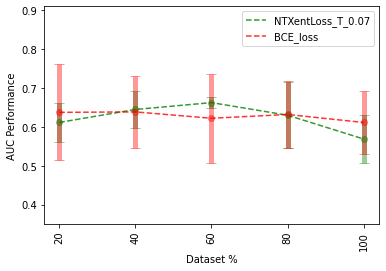

{'top': {'auc_std': [0.05007426706625096,
   0.0475707192854316,
   0.015066703539777864,
   0.08431112355766328,
   0.06226075096809478],
  'auc_mean': [0.6113833333333334,
   0.6447666666666666,
   0.6624166666666665,
   0.62995,
   0.5686500000000001]}}

In [51]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

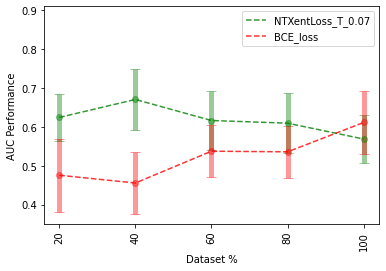

{'top': {'auc_std': [0.0602941769806818,
   0.07816532337154226,
   0.07500904389916367,
   0.07753665799693288,
   0.06226075096809478],
  'auc_mean': [0.6242833333333333,
   0.6705666666666665,
   0.61635,
   0.6094999999999999,
   0.5686500000000001]}}

In [52]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# BiparametricLenetInspiredV2

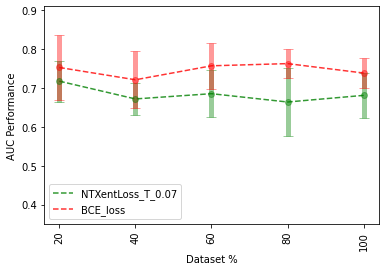

{'top': {'auc_std': [0.05309546957028338,
   0.04138539731730394,
   0.0610147158934265,
   0.08637283523577692,
   0.05805232314233616],
  'auc_mean': [0.7177333333333333,
   0.6719,
   0.6854333333333333,
   0.6639999999999999,
   0.6810833333333333]}}

In [56]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

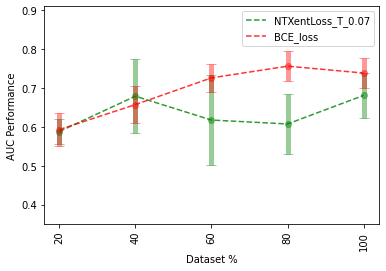

{'top': {'auc_std': [0.032436621964138705,
   0.09448904110471694,
   0.11509833476930352,
   0.07657781082736113,
   0.05805232314233616],
  'auc_mean': [0.5880166666666666,
   0.6789833333333333,
   0.6175333333333334,
   0.6074166666666666,
   0.6810833333333333]}}

In [57]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

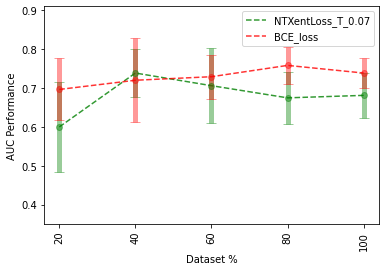

{'top': {'auc_std': [0.11619390402828081,
   0.06123339684264533,
   0.0972703220697637,
   0.06675930230645345,
   0.05805232314233616],
  'auc_mean': [0.5998166666666667,
   0.7386,
   0.7060333333333333,
   0.6747,
   0.6810833333333333]}}

In [58]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'BiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'BiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

# MultiparametricLenetInspiredV1

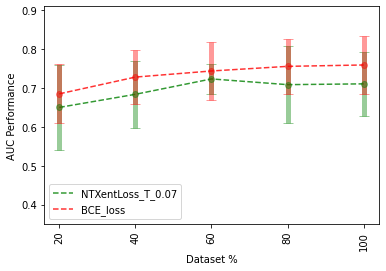

{'top': {'auc_std': [0.11011446569618163,
   0.0865622512030119,
   0.03759741421368704,
   0.09956706840673328,
   0.08223452235324695],
  'auc_mean': [0.6500999999999999,
   0.6838166666666667,
   0.7234499999999999,
   0.7086833333333333,
   0.71075]}}

In [59]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

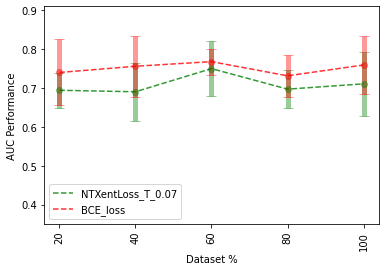

{'top': {'auc_std': [0.04511379439200878,
   0.07473271632216305,
   0.07022921993966139,
   0.04960089604925391,
   0.08223452235324695],
  'auc_mean': [0.6942166666666666,
   0.6903499999999999,
   0.7499499999999999,
   0.6971333333333333,
   0.71075]}}

In [60]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

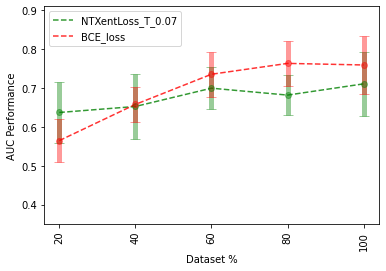

{'top': {'auc_std': [0.055434696315173934,
   0.044959043089856314,
   0.05739029147473951,
   0.058256482710319725,
   0.07361826464192761],
  'auc_mean': [0.5645833333333332,
   0.6578,
   0.7354833333333334,
   0.7634333333333334,
   0.7593666666666666]}}

In [64]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV1512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV164', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_4

# MultiparametricLenetInspiredV2

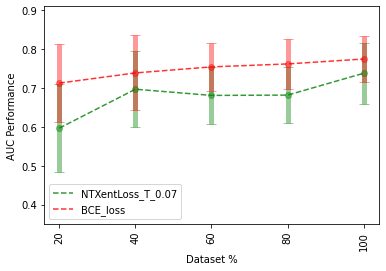

{'top': {'auc_std': [0.11286893086919696,
   0.09799736957921087,
   0.07277179704009266,
   0.07263329508948055,
   0.0792161599675218],
  'auc_mean': [0.5967333333333333,
   0.6969333333333333,
   0.6809833333333332,
   0.6817666666666667,
   0.7379999999999999]}}

In [65]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'stratified'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

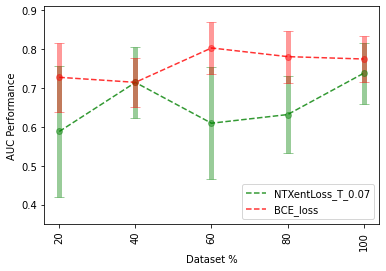

{'top': {'auc_std': [0.16895516828108248,
   0.09096109669034949,
   0.1438113308779558,
   0.09939910574156197,
   0.0792161599675218],
  'auc_mean': [0.5881333333333334,
   0.7143833333333334,
   0.6093833333333334,
   0.6316333333333333,
   0.7379999999999999]}}

In [66]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1

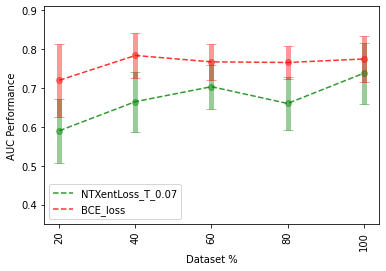

{'top': {'auc_std': [0.08299826638082401,
   0.07707266412649531,
   0.05694138311554355,
   0.06788461615941502,
   0.0792161599675218],
  'auc_mean': [0.5899833333333333,
   0.6649333333333333,
   0.70345,
   0.6602166666666667,
   0.7379999999999999]}}

In [67]:
optimizer = 'RMSprop_mom_0.6_lr_1e-06'
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'MultiparametricLenetInspiredV2512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy, optimizer)
baseline_4 = get_cross_entropy_results(window_size, 'MultiparametricLenetInspiredV264', strategy, 'RMSprop_mom_0.6_lr_1e-06')


percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'red'
plt.plot(baseline_4[classifier]['auc_mean'], 
         label='BCE_loss', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_4[classifier]['auc_mean'],
             yerr=baseline_4[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')
plt.show()
baseline_1